In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm_notebook as tqdm
tqdm.pandas()

In [ ]:
rows, columns = 1000, 1000
MAX_TEMP_ERROR = 0.01
temperature = np.empty((rows+2 , columns+2 ))
temperature_last = np.empty((rows+2 ,columns+2 ))

def initialize_temperature(temp):
  temp[:,:] = 0

  #Set right side boundary condition
  for i in tqdm(range(rows+1)):
    temp[i ,columns+1] = ( 100/rows ) * i
  #Set bottom boundary condition
  for i in tqdm(range(columns+1)):
    temp[rows+1, i ] = ( 100/rows ) * i

def output(data):
  plt.imshow(data)
  data.tofile('plate.out')

  #bottom corner
  plt.imshow(data[-5:,-5:])

In [ ]:
temperature_last

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
initialize_temperature(temperature_last)
max_iterations = int(input("Maximum iterations: "))

dt = 100
iteration = 1

  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 0/1001 [00:00<?, ?it/s]

Maximum iterations: 4000


  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

7788.943763494492


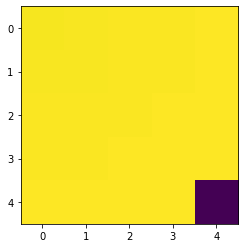

In [ ]:
pbar = tqdm(total=max_iterations)
t1 = time.time()
while ( dt > MAX_TEMP_ERROR ) and ( iteration < max_iterations):
  for i in range( 1 , rows+1 ):
    for j in range( 1 , columns+1 ):
      temperature[ i , j ] = 0.25 * ( temperature_last [i+1,j] + temperature_last [i-1,j] + temperature_last [i,j+1] + temperature_last [i,j-1] )


  dt = 0
  for i in range( 1 ,rows+1 ):
    for j in range( 1 ,columns+1 ):
      dt = max(dt, temperature[i,j]-temperature_last[i,j])
      temperature_last[i,j] = temperature [i , j]
  
  # print(iteration)
  iteration += 1
  pbar.update(1)
pbar.close()
pbar = tqdm(total=max_iterations)
t2 = time.time()
print(t2-t1)
# print(temperature_last)
# print(temperature)
output(temperature_last)

In [ ]:
plate = np.fromfile("plate.out.serial", dtype =float).reshape((1002,1002))
#matplotlib.pyplot.imshow(plate)
plt.imshow(plate, plt.colors.LogNorm(0.1,50,clip=True))

FileNotFoundError: ignored

use diff from linux commands